In [155]:
# Gain modulation RNN with oja learning on weight matrix
import numpy as np
import sys
sys.path.append("..")
from rnn_sin2 import RNN
import matplotlib.pyplot as plt
import json
import torch
import seaborn as sns

## Loading Trained Weights

In [156]:
with open('../weights/SIN2_bphebbpt_32_nodes/weight_history.json') as f:
    weight_history = json.load(f)

In [157]:
weight_history.keys()

dict_keys(['trained gain', 'trained shift', 'trained weights', 'connectivity matrix', 'input weights', 'output weights', 'losses', 'gain_changes', 'shift_changes', 'init_weight', 'init_activations'])

In [158]:
gains = np.array(weight_history['trained gain'])
shifts = np.array(weight_history['trained shift'])
weight_matrix = np.array(weight_history['trained weights'])
connectivity_matrix = np.array(weight_history['connectivity matrix'])
input_weight_matrix = np.array(weight_history['input weights'])
output_weight_matrix = np.array(weight_history['output weights'])
losses = np.array(weight_history['losses'])
gain_changes = np.array(weight_history['gain_changes'])
shift_changes = np.array(weight_history['shift_changes'])
init_weight_matrix = np.array(weight_history['init_weight'])
# weights = weight_history['weights']
init_activations = np.array(weight_history['init_activations'])

In [159]:
init_activations

array([[9.98759806e-01],
       [9.97512281e-01],
       [9.92291451e-01],
       [9.62091625e-01],
       [9.30607915e-01],
       [9.17006075e-01],
       [9.07576859e-01],
       [8.96557570e-01],
       [8.64090502e-01],
       [8.52828324e-01],
       [8.47484589e-01],
       [8.44263077e-01],
       [8.37439895e-01],
       [2.65603185e-01],
       [3.74858850e-03],
       [1.80406532e-05],
       [3.08739394e-01],
       [3.43232214e-01],
       [3.23005468e-01],
       [6.03945971e-01],
       [6.26077831e-01],
       [6.21316254e-01],
       [6.08370841e-01],
       [5.92219591e-01],
       [5.55168927e-01],
       [9.99660850e-01],
       [9.99859571e-01],
       [9.99901652e-01],
       [9.99930978e-01],
       [9.99950290e-01],
       [9.99959886e-01],
       [9.99967158e-01]])

In [160]:
output_weight_matrix

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.]])

In [161]:
weight_matrix

array([[ 0.        ,  1.31033468,  1.31033468, ..., -1.22899079,
        -1.22899079, -1.22899079],
       [ 1.31033468,  0.        ,  1.31033468, ..., -1.22899079,
        -1.22899079, -1.22899079],
       [ 1.31033468,  1.31033468,  0.        , ..., -1.22894609,
        -1.22894609, -1.22899079],
       ...,
       [ 1.31033468,  1.31033468,  1.31033468, ...,  0.        ,
        -1.22899079, -1.22899079],
       [ 1.31033468,  1.31033468,  1.31033468, ..., -1.22899079,
         0.        , -1.22899079],
       [ 1.31033468,  1.31033468,  1.31033468, ..., -1.22899079,
        -1.22899079,  0.        ]])

<Axes: >

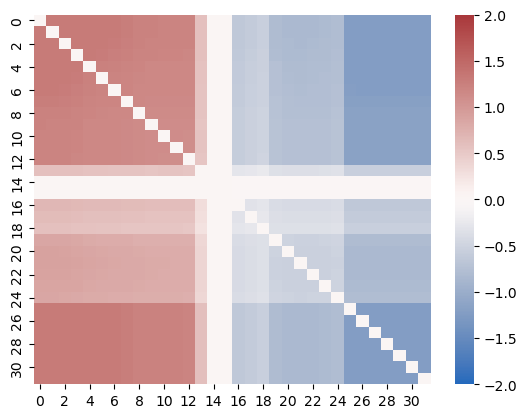

In [162]:
sns.heatmap(weight_matrix, vmax=2, vmin=-2, cmap='vlag')

## Defining Network

In [163]:
time_constant = 100 #ms
timestep = 10 #ms
ndata = 800
time = ndata * timestep #ms
num_inputs = 1
num_nodes = 32
# init_activations = np.zeros((num_nodes, 1))

network = RNN(weight_matrix, connectivity_matrix, init_activations, gains, shifts, input_weight_matrix, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)

100%|██████████| 800/800 [00:00<00:00, 26479.40it/s]


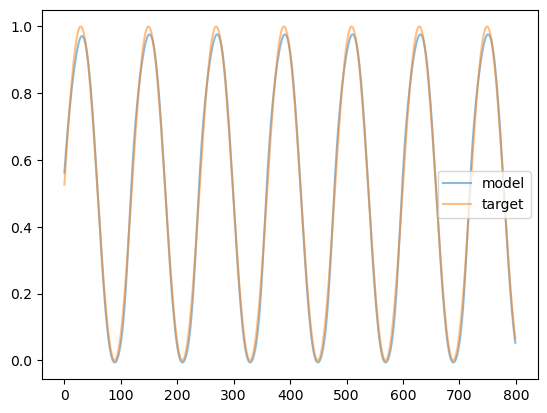

In [164]:
time_points = np.arange(ndata).reshape(-1, 1)
inputs = (1 + np.sin(time_points/60*np.pi))/2
targets = (1 + np.sin((time_points+1)/60*np.pi))/2
inputs = inputs.reshape(-1, 1)
targets = targets.reshape(-1, 1)

outputs, activations = network.simulate(time, torch.tensor(inputs).float())
fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
plt.plot(time_points, targets, alpha=0.5, label='target')
# plt.ylim([0,1])
plt.legend()
# plt.savefig("fig/sin_oja_train.png")

(0.0, 0.01)

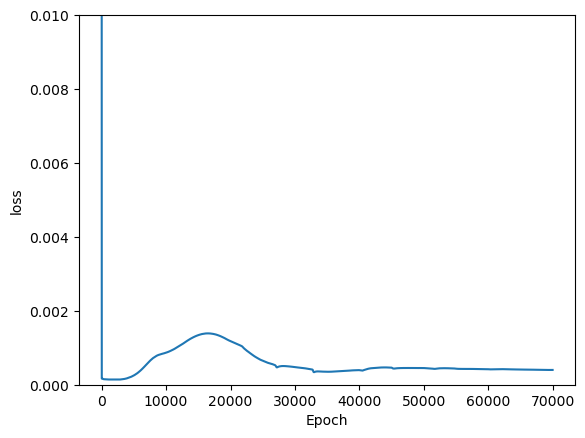

In [165]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.ylim([0,0.01])
# plt.savefig("fig/sin_oja_loss.png")

Text(0, 0.5, 'gain changes')

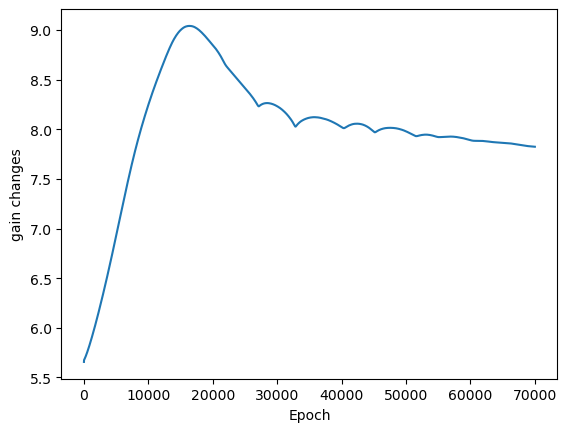

In [166]:
plt.plot(np.arange(len(gain_changes)), gain_changes)
plt.xlabel("Epoch")
plt.ylabel("gain changes")
# plt.ylim([0,0.5])
# plt.savefig("fig/sin_oja_gainchange.png")

Text(0, 0.5, 'shift changes')

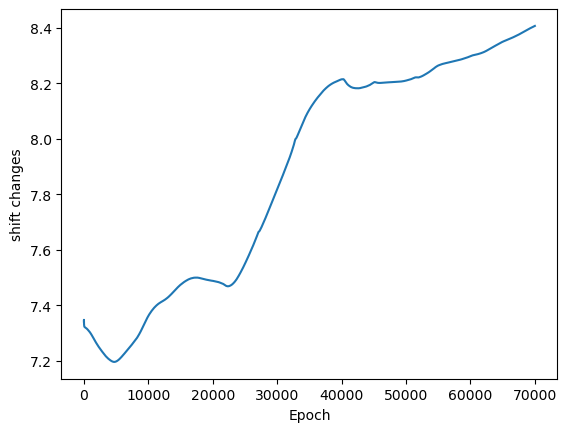

In [167]:
plt.plot(np.arange(len(shift_changes)), shift_changes)
plt.xlabel("Epoch")
plt.ylabel("shift changes")
# plt.ylim([0,0.5])
# plt.savefig("fig/sin_oja_gainchange.png")

In [168]:
# plt.plot(np.arange(len(weight_sums)), weight_sums)
# plt.xlabel("Epoch")
# plt.ylabel("weight sums")
# # plt.ylim([0,0.5])
# # plt.savefig("fig/sin_oja_weightsum.png")